In [1]:
# Needed libraries 
# Reference Material 
# https://www.youtube.com/watch?v=j_KuqOktXZM&list=PL6UJrXaOPPcEesMFPaieQJwnBvKiRH2tT&index=2
# https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html

import pandas as pd 
from datetime import datetime
import matplotlib.pyplot as plt
from prophet import Prophet 


# Making the plots standard 
%matplotlib inline
plt.rcParams["figure.figsize"] = [16, 5]

In [2]:
df = pd.read_pickle('df_timeseries.pickle')

In [3]:
# Creating the prophet dataframe 
df_prophet = df.copy()
df_prophet.groupby(['nprb_id','dst_addr'])

#Extracting the results of one probe and destination
df_prophet = df_prophet[(df_prophet['nprb_id'] == 'es1') & (df_prophet['dst_addr'] == "52.46.200.93")]

In [4]:
# Extracting the results column in order to process the avg rtt
df_rtt = df_prophet.result.apply(pd.Series).set_axis(['ping_one','ping_two','ping_three',3,4,5],axis=1) #https://stackoverflow.com/questions/70584804/how-to-extract-list-of-dictionaries-from-pandas-column
df_rtt = df_rtt.dropna(axis=1)

#https://stackoverflow.com/questions/35711059/extract-dictionary-value-from-column-in-data-frame?noredirect=1&lq=1
df_rtt['ping_one_Value'] = df_rtt['ping_one'].apply(lambda x: x.get('rtt'))
df_rtt['ping_two_Value'] = df_rtt['ping_two'].apply(lambda x: x.get('rtt'))
df_rtt['ping_three_Value'] = df_rtt['ping_three'].apply(lambda x: x.get('rtt'))

#getting the average of the ping values 
df_rtt['avg_rtt_result'] = df_rtt[['ping_one_Value','ping_two_Value','ping_three_Value']].mean(axis=1)
df_rtt

,ping_one,ping_two,ping_three,ping_one_Value,ping_two_Value,ping_three_Value,avg_rtt_result
22549,{'rtt': 51.698169},{'rtt': 51.756525},{'rtt': 51.723537},51.698169,51.756525,51.723537,51.726077
22559,{'rtt': 50.993586},{'rtt': 50.971157},{'rtt': 51.112259},50.993586,50.971157,51.112259,51.025667
22569,{'rtt': 51.715804},{'rtt': 51.724153},{'rtt': 51.679314},51.715804,51.724153,51.679314,51.706424
22579,{'rtt': 51.063621},{'rtt': 51.03592},{'rtt': 51.056587},51.063621,51.035920,51.056587,51.052043
22589,{'rtt': 51.104533},{'rtt': 51.177799},{'rtt': 51.017722},51.104533,51.177799,51.017722,51.100018
...,...,...,...,...,...,...,...
28134,{'rtt': 54.721446},{'rtt': 54.704551},{'rtt': 54.813593},54.721446,54.704551,54.813593,54.746530
28144,{'rtt': 54.766741},{'rtt': 54.754952},{'rtt': 54.855641},54.766741,54.754952,54.855641,54.792445
28154,{'rtt': 54.694568},{'rtt': 54.759688},{'rtt': 54.732717},54.694568,54.759688,54.732717,54.728991
28164,{'rtt': 48.771845},{'rtt': 48.712132},{'rtt': 48.650611},48.771845,48.712132,48.650611,48.711529


In [5]:
#adding the avg-rtt from the three pings to the original dataframe 
df_prophet =  pd.concat([df_prophet,df_rtt],axis = 1)
df_prophet

,fw,mver,lts,dst_name,af,dst_addr,src_addr,proto,ttl,size,...,stored_timestamp,nprb_id,new_time,ping_one,ping_two,ping_three,ping_one_Value,ping_two_Value,ping_three_Value,avg_rtt_result
22549,5080,2.6.2,43,52.46.200.93,4,52.46.200.93,172.31.6.130,ICMP,224.0,64,...,1673864259,es1,2023-01-16 11:17:39,{'rtt': 51.698169},{'rtt': 51.756525},{'rtt': 51.723537},51.698169,51.756525,51.723537,51.726077
22559,5080,2.6.2,49,52.46.200.93,4,52.46.200.93,172.31.6.130,ICMP,224.0,64,...,1673864518,es1,2023-01-16 11:21:58,{'rtt': 50.993586},{'rtt': 50.971157},{'rtt': 51.112259},50.993586,50.971157,51.112259,51.025667
22569,5080,2.6.2,39,52.46.200.93,4,52.46.200.93,172.31.6.130,ICMP,224.0,64,...,1673864814,es1,2023-01-16 11:26:54,{'rtt': 51.715804},{'rtt': 51.724153},{'rtt': 51.679314},51.715804,51.724153,51.679314,51.706424
22579,5080,2.6.2,48,52.46.200.93,4,52.46.200.93,172.31.6.130,ICMP,224.0,64,...,1673865112,es1,2023-01-16 11:31:52,{'rtt': 51.063621},{'rtt': 51.03592},{'rtt': 51.056587},51.063621,51.035920,51.056587,51.052043
22589,5080,2.6.2,0,52.46.200.93,4,52.46.200.93,172.31.6.130,ICMP,224.0,64,...,1673865422,es1,2023-01-16 11:37:02,{'rtt': 51.104533},{'rtt': 51.177799},{'rtt': 51.017722},51.104533,51.177799,51.017722,51.100018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28134,5080,2.6.2,42,52.46.200.93,4,52.46.200.93,172.31.6.130,ICMP,224.0,64,...,1674031922,es1,2023-01-18 09:52:02,{'rtt': 54.721446},{'rtt': 54.704551},{'rtt': 54.813593},54.721446,54.704551,54.813593,54.746530
28144,5080,2.6.2,43,52.46.200.93,4,52.46.200.93,172.31.6.130,ICMP,224.0,64,...,1674032203,es1,2023-01-18 09:56:43,{'rtt': 54.766741},{'rtt': 54.754952},{'rtt': 54.855641},54.766741,54.754952,54.855641,54.792445
28154,5080,2.6.2,35,52.46.200.93,4,52.46.200.93,172.31.6.130,ICMP,224.0,64,...,1674032511,es1,2023-01-18 10:01:51,{'rtt': 54.694568},{'rtt': 54.759688},{'rtt': 54.732717},54.694568,54.759688,54.732717,54.728991
28164,5080,2.6.2,49,52.46.200.93,4,52.46.200.93,172.31.6.130,ICMP,224.0,64,...,1674032810,es1,2023-01-18 10:06:50,{'rtt': 48.771845},{'rtt': 48.712132},{'rtt': 48.650611},48.771845,48.712132,48.650611,48.711529


In [6]:
#Using prophet for some basic time forecasting 
#prophet requires a ds and a y column . ds = timestamp , y = value being forecasted 
df_prophet.rename(columns={"new_time": "ds", "avg_rtt_result": "y"},inplace = True)
df_prophet

,fw,mver,lts,dst_name,af,dst_addr,src_addr,proto,ttl,size,...,stored_timestamp,nprb_id,ds,ping_one,ping_two,ping_three,ping_one_Value,ping_two_Value,ping_three_Value,y
22549,5080,2.6.2,43,52.46.200.93,4,52.46.200.93,172.31.6.130,ICMP,224.0,64,...,1673864259,es1,2023-01-16 11:17:39,{'rtt': 51.698169},{'rtt': 51.756525},{'rtt': 51.723537},51.698169,51.756525,51.723537,51.726077
22559,5080,2.6.2,49,52.46.200.93,4,52.46.200.93,172.31.6.130,ICMP,224.0,64,...,1673864518,es1,2023-01-16 11:21:58,{'rtt': 50.993586},{'rtt': 50.971157},{'rtt': 51.112259},50.993586,50.971157,51.112259,51.025667
22569,5080,2.6.2,39,52.46.200.93,4,52.46.200.93,172.31.6.130,ICMP,224.0,64,...,1673864814,es1,2023-01-16 11:26:54,{'rtt': 51.715804},{'rtt': 51.724153},{'rtt': 51.679314},51.715804,51.724153,51.679314,51.706424
22579,5080,2.6.2,48,52.46.200.93,4,52.46.200.93,172.31.6.130,ICMP,224.0,64,...,1673865112,es1,2023-01-16 11:31:52,{'rtt': 51.063621},{'rtt': 51.03592},{'rtt': 51.056587},51.063621,51.035920,51.056587,51.052043
22589,5080,2.6.2,0,52.46.200.93,4,52.46.200.93,172.31.6.130,ICMP,224.0,64,...,1673865422,es1,2023-01-16 11:37:02,{'rtt': 51.104533},{'rtt': 51.177799},{'rtt': 51.017722},51.104533,51.177799,51.017722,51.100018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28134,5080,2.6.2,42,52.46.200.93,4,52.46.200.93,172.31.6.130,ICMP,224.0,64,...,1674031922,es1,2023-01-18 09:52:02,{'rtt': 54.721446},{'rtt': 54.704551},{'rtt': 54.813593},54.721446,54.704551,54.813593,54.746530
28144,5080,2.6.2,43,52.46.200.93,4,52.46.200.93,172.31.6.130,ICMP,224.0,64,...,1674032203,es1,2023-01-18 09:56:43,{'rtt': 54.766741},{'rtt': 54.754952},{'rtt': 54.855641},54.766741,54.754952,54.855641,54.792445
28154,5080,2.6.2,35,52.46.200.93,4,52.46.200.93,172.31.6.130,ICMP,224.0,64,...,1674032511,es1,2023-01-18 10:01:51,{'rtt': 54.694568},{'rtt': 54.759688},{'rtt': 54.732717},54.694568,54.759688,54.732717,54.728991
28164,5080,2.6.2,49,52.46.200.93,4,52.46.200.93,172.31.6.130,ICMP,224.0,64,...,1674032810,es1,2023-01-18 10:06:50,{'rtt': 48.771845},{'rtt': 48.712132},{'rtt': 48.650611},48.771845,48.712132,48.650611,48.711529


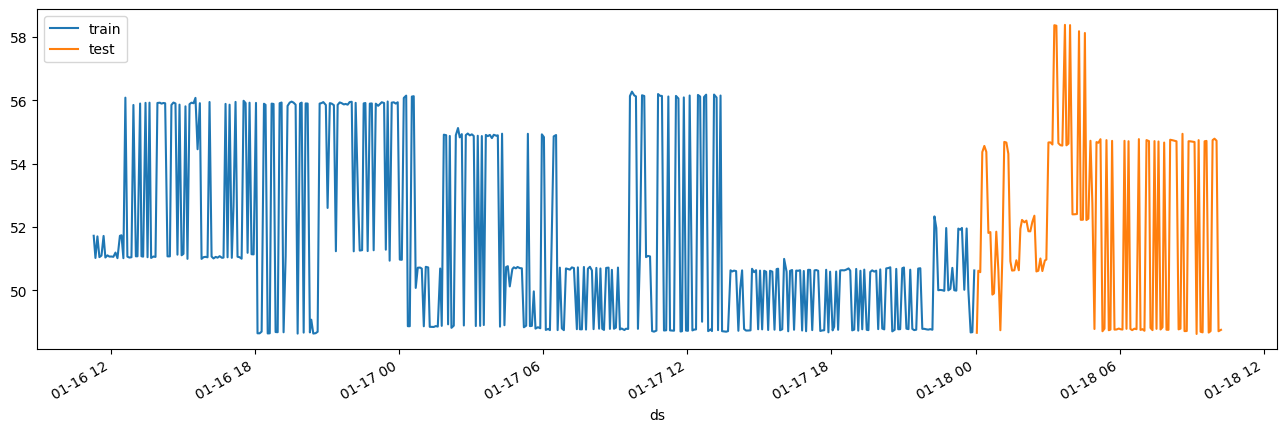

In [7]:
train = df_prophet.loc[df_prophet['ds'] <= '2023-01-18']
test = df_prophet.loc[df_prophet['ds']>= '2023-01-18']

fig, ax = plt.subplots()
train.plot(x="ds", y="y", ax=ax, label="train")
test.plot(x="ds", y="y", ax=ax, label="test")
plt.legend(loc='upper left')
plt.show()

In [8]:
# create a Prophet model - with additional regressor 
model = Prophet()

# fit the model to the data
model.add_regressor('ping_one_Value')
model.fit(train)


# make predictions for the future dates
forecast = model.predict(test)
forecast

15:41:43 - cmdstanpy - INFO - Chain [1] start processing
15:41:43 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,ping_one_Value,ping_one_Value_lower,ping_one_Value_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-01-18 00:03:10,51.583149,48.355498,49.077340,51.583149,51.583149,-2.888848,-2.888848,-2.888848,-2.888848,-2.888848,-2.888848,-2.888848,-2.888848,-2.888848,0.0,0.0,0.0,48.694302
1,2023-01-18 00:06:51,51.583075,50.238625,50.979209,51.583075,51.583075,-0.974411,-0.974411,-0.974411,-0.974411,-0.974411,-0.974411,-0.974411,-0.974411,-0.974411,0.0,0.0,0.0,50.608664
2,2023-01-18 00:11:46,51.582976,50.172109,50.899026,51.582976,51.582976,-1.026454,-1.026454,-1.026454,-1.026454,-1.026454,-1.026454,-1.026454,-1.026454,-1.026454,0.0,0.0,0.0,50.556522
3,2023-01-18 00:16:52,51.582873,53.886861,54.609881,51.582830,51.582873,2.668675,2.668675,2.668675,2.668675,2.668675,2.668675,2.668675,2.668675,2.668675,0.0,0.0,0.0,54.251548
4,2023-01-18 00:21:57,51.582771,53.920508,54.648253,51.582636,51.582910,2.697122,2.697122,2.697122,2.697122,2.697122,2.697122,2.697122,2.697122,2.697122,0.0,0.0,0.0,54.279893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,2023-01-18 09:52:02,51.571279,54.258151,55.010542,51.466124,51.677831,3.051972,3.051972,3.051972,3.051972,3.051972,3.051972,3.051972,3.051972,3.051972,0.0,0.0,0.0,54.623251
119,2023-01-18 09:56:43,51.571185,54.301866,55.046303,51.465123,51.679228,3.096493,3.096493,3.096493,3.096493,3.096493,3.096493,3.096493,3.096493,3.096493,0.0,0.0,0.0,54.667678
120,2023-01-18 10:01:51,51.571081,54.208419,54.973900,51.463106,51.680383,3.025553,3.025553,3.025553,3.025553,3.025553,3.025553,3.025553,3.025553,3.025553,0.0,0.0,0.0,54.596634
121,2023-01-18 10:06:50,51.570981,48.390114,49.170405,51.460704,51.681378,-2.795986,-2.795986,-2.795986,-2.795986,-2.795986,-2.795986,-2.795986,-2.795986,-2.795986,0.0,0.0,0.0,48.774995


In [9]:
#impact of each regressor on our prediction 
from prophet.utilities import regressor_coefficients
regressor_coefficients(model)

,regressor,regressor_mode,center,coef_lower,coef,coef_upper
0,ping_one_Value,additive,51.616428,0.982916,0.982916,0.982916


In [10]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(model,forecast)

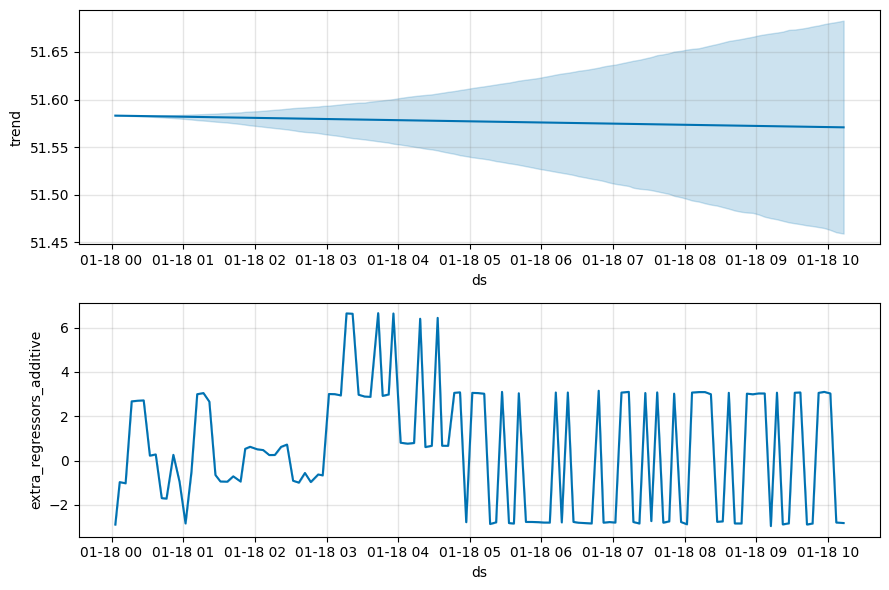

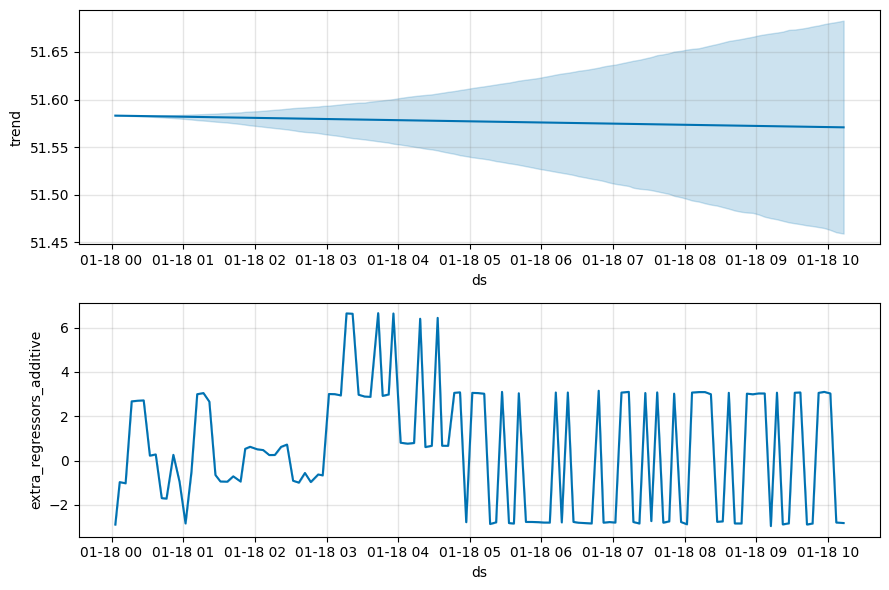

In [11]:
model.plot_components(forecast)

In [12]:
# Comparing test and predicted values 
# Note: While Performing some operations on a dataframe, its dimensions change not the indices, 
# hence we need to perform reset_index operation on the dataframe. https://stackoverflow.com/questions/50368145/pandas-concat-increases-number-of-rows

result_df = pd.concat([test.reset_index(drop=True), forecast.reset_index(drop=True)], axis=1)
result_df[['y','yhat']]

,y,yhat
0,48.662406,48.694302
1,50.622346,50.608664
2,50.576749,50.556522
3,54.370250,54.251548
4,54.563369,54.279893
...,...,...
118,54.746530,54.623251
119,54.792445,54.667678
120,54.728991,54.596634
121,48.711529,48.774995


In [13]:
# Testing the prediction accuracy 
se = (result_df['yhat'] - result_df['y']) ** 2 
se.mean()

0.03689524755684205

In [14]:
# Forecating with no additional regressor 
# create a Prophet model
model = Prophet()

# fit the model to the data
model.fit(train)


# make predictions for the future dates
forecast = model.predict(test)
forecast

15:41:44 - cmdstanpy - INFO - Chain [1] start processing
15:41:44 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-01-18 00:03:10,49.548452,46.321317,52.479565,49.548452,49.548452,0.0,0.0,0.0,0.0,0.0,0.0,49.548452
1,2023-01-18 00:06:51,49.542187,46.367052,52.943770,49.542187,49.542187,0.0,0.0,0.0,0.0,0.0,0.0,49.542187
2,2023-01-18 00:11:46,49.533824,46.524508,52.551775,49.533824,49.533824,0.0,0.0,0.0,0.0,0.0,0.0,49.533824
3,2023-01-18 00:16:52,49.525149,46.311922,52.744308,49.525091,49.525149,0.0,0.0,0.0,0.0,0.0,0.0,49.525149
4,2023-01-18 00:21:57,49.516502,46.372648,52.487248,49.516066,49.516849,0.0,0.0,0.0,0.0,0.0,0.0,49.516502
...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,2023-01-18 09:52:02,48.546785,45.087988,51.792694,48.153638,48.986338,0.0,0.0,0.0,0.0,0.0,0.0,48.546785
119,2023-01-18 09:56:43,48.538818,45.473444,51.911571,48.140071,48.983456,0.0,0.0,0.0,0.0,0.0,0.0,48.538818
120,2023-01-18 10:01:51,48.530086,45.037260,51.718683,48.125470,48.979001,0.0,0.0,0.0,0.0,0.0,0.0,48.530086
121,2023-01-18 10:06:50,48.521610,45.512884,51.606099,48.110935,48.974801,0.0,0.0,0.0,0.0,0.0,0.0,48.521610


In [15]:
plot_plotly(model,forecast)

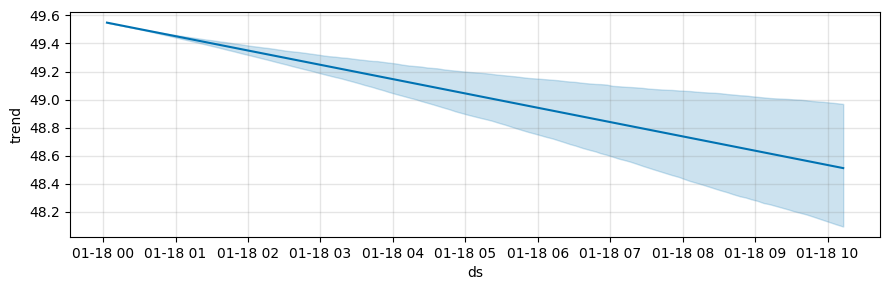

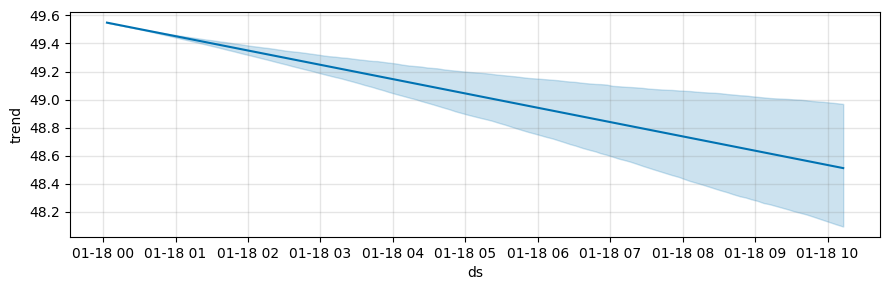

In [16]:
model.plot_components(forecast)

In [17]:
result_df = pd.concat([test.reset_index(drop=True), forecast.reset_index(drop=True)], axis=1)
result_df[['y','yhat']]

,y,yhat
0,48.662406,49.548452
1,50.622346,49.542187
2,50.576749,49.533824
3,54.370250,49.525149
4,54.563369,49.516502
...,...,...
118,54.746530,48.546785
119,54.792445,48.538818
120,54.728991,48.530086
121,48.711529,48.521610


In [18]:
# Testing the prediction accuracy 
se = (result_df['yhat'] - result_df['y']) ** 2 
se.mean()

17.21219527600658